#    Logistic Regression from scratch


### 1. Create random data of 2 classes using make_blobs

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)
# y.reshape(-1, 1)

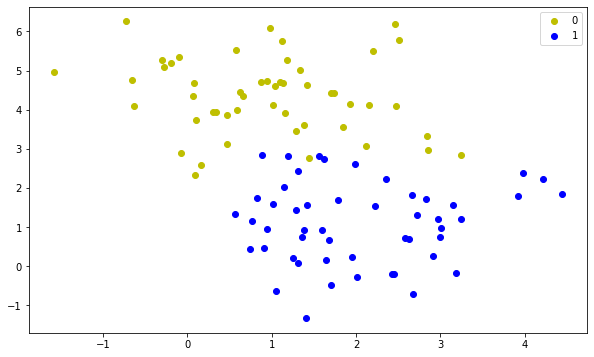

In [3]:
# plot data
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='y', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='b', label='1')
plt.legend();

### 2. Implementation and evaluation


 a) ***Sigmoid Function*** : $h_\theta(x)= \frac{1}{1+\exp(-X\theta)}$
 
 b) ***Cost Function*** : $J(\theta)=-\frac{1}{m}\sum_{i=0}^{m} y(i)\log(h_\theta(x(i)))+(1-y(i)) \log(1-h_\theta(x(i))$
 
 c) ***Descent Gradiant*** : $$ \frac{\delta J(\theta)}{\delta \theta}=\frac{1}{m}X^T.(X.\theta-y)$$
 
 d) ***Gradiant*** : $$ \theta\leftarrow \theta- \alpha\frac{\delta J(\theta)}{\delta \theta}$$
 
 e) Find $\theta$ for learning rate = $\alpha=0.1$ and number of iteration = $150$

In [4]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=150, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    # question a
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    # question b
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        # weights initialization
        self.theta = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            # question c : fonction du gradient
            gradient = np.dot(X.T, (h - y)) / y.size
            # question d
            self.theta -= self.lr * gradient

            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)

            if(self.verbose ==True and i % 150 == 0):
                print(f'loss: {loss} \t')

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        return self.__sigmoid(np.dot(X, self.theta))

    def predict(self, X):
        return self.predict_prob(X).round()

In [5]:
model = LogisticRegression(lr=0.1, num_iter=150)

In [6]:
model.fit(X, y)

In [7]:
# question e
model.theta

array([ 0.84210655,  1.23942609, -1.16143768])

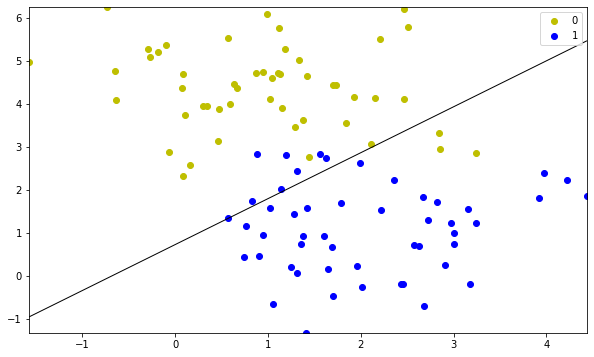

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='y', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='b', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

### 3. Make Prediction

New data : x1=(1,5); x2(3,1)

In [9]:
df_test = np.array([ [1, 5],  [3, 1] ])
model.predict(df_test)

array([0., 1.])